# Digit Classification

What does this image look like to you?

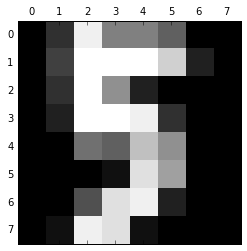

How about this one?

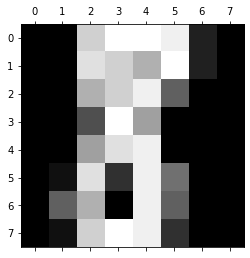

We can train a computer to predict what digit is shown by these images. If we have:

* a large dataset of many such images, and
* "labels" for some images, telling us exactly what digits they should be,

a computer can learn from the labeled images, and from commonalities / dissimilarities between images in the large dataset, to predict each image's digit.
This is _classification_, which is an example of  _machine learning_.

This notebook is adapted from the work of
Mike Smith (University of Sheffield):<br>
https://github.com/lionfish0/Classification_talk/blob/master/ipython/Classification.ipynb<br>
(mirror: https://notebook.community/lionfish0/Classification_talk/ipython/Classification).<br>
Images above are #36 and #1279 in the scikit-learn digits dataset.

To learn more about classification, check out Mike's talk:
https://lionfish0.github.io/Classification_talk

# 0. Welcome to Jupyter notebooks

You are looking at a __Jupyter notebook__ hosted on [kaggle.com](https://www.kaggle.com).  Like [codecademy.com](https://www.codecademy.com), this is another way to run Python code in your web browser.  But, this notebook has some advantages.
* It's easier for us to share and write code.
* It's a standard tool for many working programmers.  It makes it easy to create a log of your code and your reasoning.

In a Jupyter notebook, your code lives inside "cells", or blocks of code. Click on the cell below and press <kbd>Shift</kbd>+<kbd>Enter</kbd> together, to add `2+2`.  Notice:
1. We are using Python 3 instead of Python 2, so `print` requires parentheses.
2. When you run code, the result appears below each cell.
3. You can click a cell to select it, then hit <kbd>Shift</kbd>+<kbd>Enter</kbd> again to _re-run_ the same cell.

The first cell may take a little while to run -- the notebook needs time to "start up".  When you see `4` appear below the cell, you can keep going.

In [ ]:
print(2+2)

# 1. Come and get your data

We have to do some setup before we can start looking at digits.

Below is a "package import", which tells Python to load some data
from the Python package called Scikit-learn ([https://scikit-learn.org/](https://scikit-learn.org/)).


In [ ]:
# We will access the package via the newly-created variable "datasets"
from sklearn import datasets

In Python, objects can have "attributes" belonging to them, which we access using a dot: `.`

Below, we call the function `load_digits()` belonging to the variable `datasets`

The function _returns_ some unknown thing, which we store in a new variable `digits`

In [ ]:
digits = datasets.load_digits()

What is the unknown thing stored in `digits`?

__Exercise:__ use the `print(...)` function, with parentheses to take a look.

In [ ]:
# your code here

Whoa! There is a ton of stuff. We don't have time to look at everything, but the two most important parts are:

    digits.data
    digits.target

Let's see what's inside there.

__Exercise:__ use the `print(...)` function to look at `digits.data` and `digits.target`.

In [ ]:
# your code here

Now, `data` and `target` are attributes of `digits`.<br>
But, `data` and `target` also have their own attributes, such as:

    .shape
    .ndim
    .size
    
    .min()
    .max()

We can access these attributes by writing code like `print(digits.data.ndim)`.

Please note, `digits.data` and `digits.target` possess these attributes
because they are _Numpy arrays_, a special object used for data analysis and numerical
computation in Python.  Other objects, like regular Python lists, may not have these attributes.

__Exercise:__ look at the attributes of `digits.data` and `digits.target`, to better understand their contents.  Pro-tip: in Jupyter notebooks, we can skip the `print(...)` as long as we are only looking at one thing.

Try to answer the questions:

* How many elements are in `digits.data` and in `digits.target`?
* What are the dimensions of these arrays (1D, 2D, 3D, more?)
* What are some typical values?  What are the biggest and smallest values?

In [ ]:
digits.data.ndim  # try running this cell

In [ ]:
# your code here

How do we access the values in these arrays?

Python is a "zero-indexed" language.  That means, the first element of a list is accessed by index "0".  We use square brackets `[` and `]` to get the elements of a list, like so:

    >>> x = ['a', 'b', 'c']
    >>> print( x[0] )  # this will print 'a'

__Exercise:__ look at the first elements of `digits.data` and `digits.target`.

In [ ]:
# your code here

We see that, `digits.data[0]` gives us the entire first row of the matrix,
with all 64 columns.

What if we want more than one row?  We can use "slice" notation with the colon `:`.  For example, `digits.data[0:2]` will get the first two rows (indices 0 and 1, index 2 is skipped).

__Exercise__: print out the first two rows of `digits.data`, and the first two elements of `digits.target`.  Then, print the first 10 rows and first 1000 rows of `digits.data` and see what happens.

In [ ]:
# your code here

## What's in our dataset?

We conclude that `digits.data` is a 1797 x 64 matrix of numbers between 0 to 16, inclusive.

__Each value in `digits.data` encodes the lightness or darkness of one image pixel, and each of the 1797 rows represents an 8x8 image with 64 pixels total.__

Furthermore, `digits.target` is a list of 1797 numbers between 0 and 9, inclusive.

__Each value in `digits.target` tells us the "correct" digit of the corresponding image in `digits.data`.__

# 2. Look at your digits

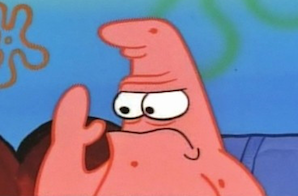

Our data looks like a bunch of numbers.  Can we actually see the digit images for ourselves?

We will use the Python package Matplotlib (https://matplotlib.org/).  Let's import the package into a new variable called `plt`, and use the provided function `plt.matshow` to look at our data.

In [ ]:
from matplotlib import pyplot as plt

# This "%" line is not Python, but a special command for Jupyter notebooks
# to show images inside the notebook.
%matplotlib inline

In [ ]:
plt.matshow(digits.data[35,:].reshape(8,8), cmap="gray")
plt.show()

__Exercise:__ print the 36th element (index 35) of `digits.target` to check what digit this image shows.

In [ ]:
# your code here

What is going on here?  Let's decipher it in pieces:

1. The command `digits.data[35,:]` means: take the 36th row and all columns of `data.digits`.
   Remember, digits.data is a 1797x64 matrix, so we will get a 64 element list.

2. We call the function `reshape(8,8)`, with input arguments 8 and 8, to change
   the 64 element list into an 8x8 matrix.

3. That 8x8 matrix is passed to the function `plt.matshow()`, which creates an _image_
   of the input matrix.

4. We call the function `plt.show()` to actually display the image on our screens.

In [ ]:
digits.data[35,:]

In [ ]:
digits.data[35,:].reshape(8,8)

We can change the color of our image by using the _keyword argument_ `cmap`.
This is another way to give an input, or argument, to a function.

The keyword argument `cmap` requires a string, in either single quotes '' or double quotes "".
Here are some strings that you can use.

    "viridis"
    "viridis_r"
    "inferno"
    "plasma"
    "magma"
    "cividis"
    "gray"

__Exercise:__ try different `cmap` inputs, and see which one you like the most.  Copy-paste the code from above to get started.

In [ ]:
# your code here

__Exercise:__ display the very first and very last digit images in the dataset.  Remember, `digits.data` is a 1797 x 64 array, and the indexing starts at zero, not one!

In [ ]:
# your code here

# 3. Look at your digits, but faster

Let's use what we have learned to construct a quick and easy way to look at digit images, and to look at the "correct answers" for each image.

We are going to define our own function, that is, our own block of code, just like building your own block in Snap! or Scratch.

__Exercise:__ below is an empty template for a new function called `digitshow`.
Add code to digitshow so that . . .
* when you run the code `digitshow(0)`, it displays the first image of the dataset
* when you run the code `digitshow(35)`, it displays the 36th image of the dataset (the "five" we saw earlier)

In [ ]:
def digitshow(n):
    """Display the n-th image (where n starts from 0) from the scikit-learn digits dataset."""
    # Put your code here.  It needs to be indented, with 4 spaces in front of each line,
    # to be part of the function definition.

In [ ]:
# run this cell to test that your function works
digitshow(0)

In [ ]:
# run this cell to test that your function works
digitshow(35)

# 4. Human vs. computer: who can read digits better?

## 4.1 Meatbags go first.

__Exercise:__ let's all look at the same ten digits, by running the cell below.  Record what _you_ think each image shows.
Then, look at the answers (read the code, to see how to do this).  How many did you get right?

In [ ]:
# this "for" loop sets n=1787, then 1788, ..., up to n=1796 (does not set n=1797),
# using Python's built-in range(...) function.

for n in range(1787,1797):
    digitshow(n)
    
    # When you are ready to see the answers, uncomment the lines below
    # by removing the '#' in front of each print(...) statement.
    
    #print("The above image shows:", digits.target[n])
    #print("="*40)

## 4.2 Computer's turn.

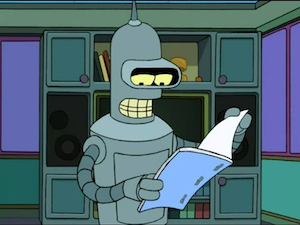

Now, we shall _train_ a computer to classify these digits. Recall from the introduction:

> If we have:
> 
> * a large dataset of many such images, and
> * "labels" for some images, telling us exactly what digits they should be,
> 
> a computer can learn from the labeled images,
> and from commonalities / dissimilarities between images in the large dataset,
> to predict each image's digit.

Let's get started!

First, we must choose some of our data, with the labels (correct answers), to train the computer.


In [ ]:
# put the first 1000 images into the variable training_data
training_data = digits.data[0:1000]

# put the first 1000 labels into the variable training_target
training_target = digits.target[0:1000]

Now that we have a set of training data to show Python (which we called `training_data`), as well as what the correct answers are supposed to be (which we called `training_target`), we can import a machine learning package from sklearn to teach Python how to read numbers!

In [ ]:
# import the package that we need
from sklearn import neighbors

In order to use this machine learning package, we have to tell the algorithm what variables hold the training data and the target data (the answers).

We will use a [supervised $k$-nearest neighbors classifier](https://scikit-learn.org/stable/modules/neighbors.html#classification).
For now, we will not explain how it works -- all you need to know is that it learns from the training data in order to make predictions.

__Exercise:__ Plug in these variables for yourself below!

In [ ]:
# Here we choose the machine learning algorithm we plan to use on our data
nn = neighbors.KNeighborsClassifier(n_neighbors=1)

# To train the data, we use the .fit function like this:
#     nn.fit(  training data goes first  ,    the second argument is target data )
# Replace the ____ below with the variables representing the training data and the target data

# When the code is run, the training knowledge will be stored in the variable "nn"

nn.fit( ____ , ____ )

We have used 1000 pictures to *train* Python to understand what a hand-drawn 1,2,3,... could look like. Now it is time to test how good Python is at learning! 

Without telling Python what the answers are, we will ask Python to predict the digits appearing in the 10 pictures of the dataset, using the `.predict` function of the machine learning algorithm! Then we'll compare against our guesses to see who did better; humans or machines?



In [ ]:
# These are the numbers that Python thinks the last 10 pictures correspond to.
nn.predict(digits.data[1787:1797])

## 4.3 Comparison

It is finally time to compare our human guesses against Python's guesses! 

Drumroll please...

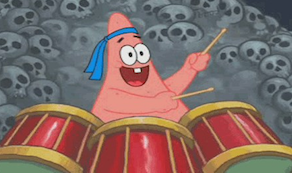

In [ ]:
print("Predicted", nn.predict(digits.data[1787:1797]))

print("Answers  ", digits.target[1787:1797])

Python got 9/10 correct. How did you do?

Python thought the 4th picture of the list was a 1, while the answer is actually 8.

__Exercise:__ use your `digitshow` function to display the picture that Python misclassified.

In [ ]:
# your code here

Can you blame Python for getting this wrong? 

# 5. Recap

In this notebook, our goal was to see if Python could learn to read handwritten numbers in 64-pixel pictures:
- We gave Python 1000 pictures to study, and told Python what digit is associated with each of these training pictures. 

            training_data = digits.data[0:1000]
            training_target = digits.target[0:1000]

            nn = neighbors.KNeighborsClassifier(n_neighbors=1)
            nn.fit(training_data, training_target)


- Using a machine learning algorithm, Python was able to look at other pictures and predict the digits without knowing the answers beforehand!

            test_data = digits.data[1787:1797]
            test_target = digits.target[1787:1797]
            
            print("Predicted", nn.predict(test_data))


- Python correctly guessed 9/10 of the last 10 digits. Not bad!

            print("Answers  ", test_target)


__There's much more we could do.__  We could...
* try to predict some other images in the dataset.  Can you beat the computer on other images?
* try to predict more images.  How does the algorithm perform on 100 images? 500 images?
* train the computer badly!  What happens if you train with only 10 images, or even fewer?
* change the algorithm.  Our algorithm is a supervised $k$-nearest neighbors classifier.  What if we use something different, like a "decision tree" classifier?

Below is some starter code to tackle these questions, for you to play and explore with.  You can jump to any of the sections 6.1, 6.2, 6.3, 6.4 in whatever order you want.

# 6. Messing around

## 6.1 Try to predict some other images in the dataset

Now that we have used the first 1000 pictures to train Python to read digits, let's mess around and ask Python to predict some other pictures. 

__Exercise:__ First, choose a number between 1000 and 1796, and save it to a variable called `my_number`

In [ ]:
# Choose a number between 1000 and 1796
my_number = ____

__Exercise:__ Now let's use the `digitshow(...)` function we defined earlier to see what this picture looks like:

What number do you think this is?

In [ ]:
# Use the digitshow(...) function to display the picture corresponding to 'my_number'

__Exercise:__ Let's ask Python what Python thinks it is. Remember, to do this, we use the `.predict(...)` function on the data.

And remember, the variable `nn` holds our machine learning model, and all the training knowledge, from before.

__PRO-TIP:__ the code will be a little different for predicting one image instead of ten.  Earlier, we did:

    nn.predict( digits.data[1787:1797] )

Now, `digits.data[1787:1797]` puts a 2D matrix with shape 10 x 64 into `nn.predict(...)`.
But, this breaks if predicting only one image, because `digits.data[1787]` gives a 1D list instead of a 2D matrix.

To solve this problem, we can do:

    nn.predict( [ digits.data[1787] ] )
    #           ^-------------------^------ notice the extra square brackets

which ensures that `nn.predict(...)` receives a 2D matrix with shape 1 x 64.

In [ ]:
# Use the nn.predict(...) function to ask the computer what the image corresponding to 'my_number' shows

__Exercise:__ Finally, let's see what the correct answer is supposed to be, using the list `digits.target`

In [ ]:
# Use digits.target to get the correct answer for the image corresponding to 'my_number'

If we wanted to do this for another number, we would have to go through this 3-step process again. How about we make a function to do this for us! 

__Exercise:__ Make a function which lets the user choose a number less than 1797. Make the function show or print the following items:
* the picture corresponding to that item in the dataset
* what Python *predicts* the image to be
* what the answer actually is!

In [ ]:
def predict_one_image(num):
    # inside the function, the argument variable "num" now takes the place of "my_number".
    # the variable "num" is valid everywhere inside your function,
    # but cannot be used outside the function (think of the Snap! block maker)
    
    # put your code here.  All code has to be indented with 4 spaces.

In [ ]:
predict_one_image(my_number)  # run this to test your code

## 6.2 Try to predict more images. How does the algorithm perform with 100 images? 500 images?

Earlier, we saw that the computer got 9 of 10 images right.  We say that our algorithm was 90% accurate.

But, is our algorithm _really_ 90% accurate?  Maybe the 10 images were really easy, and the computer is not actually that good.  Or, maybe the one incorrect prediction was unusually hard, and the computer is better than we give it credit for.

We can test this by giving the computer more images to test on, to get a better sense of its accuracy.

As a reminder, here is the code structure we used earlier to train with 1000 images, then predict 10 images.

    # choose your training set
    training_data = digits.data[0:1000]
    training_target = digits.target[0:1000]

    # train the machine
    nn = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn.fit(training_data, training_target)

    # choose your test set, for the machine to try predicting
    test_data = digits.data[1787:1797]
    test_target = digits.target[1787:1797]

    # compare prediction to the correct answers
    print("Predicted", nn.predict(test_data))
    print("Answers  ", test_target)

__Exercise:__ write your own code, similar to the above, but change the test set to use more than 10 images.  Maybe 100, or 500 images?  Beware: __your test set should not have any images used in training__, as you will get biased/incorrect results that way.

Print out the computer predictions, and print out the correct answers.

In [ ]:
# put your code here

It was easy to calculate the accuracy when we predicted 10 images.  We could look, and add up in our heads the number of correct versus incorrect answers:

    >>> print("Predicted", nn.predict(digits.data[1787:1797]))
    >>> print("Answers  ", digits.target[1787:1797])

    Predicted [5 4 8 1 4 9 0 8 9 8]
    Answers   [5 4 8 8 4 9 0 8 9 8]

But, that's not so easy if we have 100 predictions.  So, below is a function to help you calculate the accuracy.

__Exercise:__ read the code for the `accuracy(...)` function until you think you understand what it does.  Then, calculate the accuracy of the machine learning algorithm for >10 test images.

In [ ]:
def accuracy(predictions, answers):
    """Report the percent accuracy, defined as 100 x (correct predictions / total predictions)"""
    
    if len(predictions) != len(answers):
        print("Number of predictions does not match answers")
    
    correct = 0
    total = len(predictions)
    
    # loop sets i=0, i=1, ... all the way up to i=(total - 1)
    for i in range(total):
        if predictions[i] == answers[i]:
            correct = correct + 1
    
    accuracy = 100 * correct / total
    print("Accuracy was", accuracy, "% based upon", total, "predictions")

In [ ]:
# use the accuracy(...) function here on your predictions and answers

## 6.3 Train the computer badly!  What happens if you train with only 10 images, or even fewer?

If we change the training data, the algorithm will perform differently.  Usually, more data is a good thing (up to a certain point).  What happens if we give the computer very little data to learn from?

As a reminder, here is the code structure we used earlier to train with 1000 images, then predict 10 images.

    # choose your training set
    training_data = digits.data[0:1000]
    training_target = digits.target[0:1000]

    # train the machine
    nn = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn.fit(training_data, training_target)

    # choose your test set, for the machine to try predicting
    test_data = digits.data[1787:1797]
    test_target = digits.target[1787:1797]

    # compare prediction to the correct answers
    print("Predicted", nn.predict(test_data))
    print("Answers  ", test_target)

__Exercise:__ write your own code, similar to the above, but change the training set to use few images, say 100 images, or 10 images.  Then, make the computer predict some images.  How does the computer do now?

If you have done Section 6.2, you might want to check: how has the accuracy of the algorithm changed, with fewer training images?

In [ ]:
# put your code here

## 6.4 Change the algorithm?

Our algorithm is a supervised $k$-nearest neighbors classifier.  What if we use something different, like a "decision tree" classifier?  Below, you can choose your own algorithm and see how it performs.

In [ ]:
# import different classification algorithms from scikit-learn
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

__Exercise:__ select a classifier algorithm by uncommenting exactly one of the lines of code below.

To uncomment, remove '#' at the front.<br>
To comment, add '#' at the front.

If you have more than one line uncommented, Python will run all the lines of code.<br>
Your classifier will then be the very last uncommented line.

Also, notice that we have changed our algorithm's variable from `nn` (nearest neighbor) to `csf` (classifier), to be more general.

In [ ]:
csf = neighbors.KNeighborsClassifier(n_neighbors=1)  # the algorithm we used before

#csf = tree.DecisionTreeClassifier()

#csf = ensemble.RandomForestClassifier(n_estimators=50, min_samples_split=1.0, max_depth=None, max_features=16)

#csf = ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_split=1.0, max_depth=None, max_features=8)

#csf= svm.LinearSVC(C=0.05)  # Linear Support Vector Machine classifier

#csf = naive_bayes.GaussianNB()  # Gaussian Naive Bayes classifier

__Exercise:__ now that the variable `csf` holds your algorithm of choice, train your algorithm (with `csf.fit(...)` and try to predict some images.  How does your new algorithm do?

In [ ]:
# choose your training set
training_data = digits.data[0:1000]
training_target = digits.target[0:1000]

# train the machine
csf.fit(training_data, training_target)

# choose your test set, for the machine to try predicting
test_data = digits.data[1787:1797]
test_target = digits.target[1787:1797]

# compare prediction to the correct answers
print("Predicted", csf.predict(test_data))  # changed from "nn" to "csf"
print("Answers  ", test_target)

You will probably find that the Nearest Neighbors classifier is one of the best performers, for this digits dataset.